# Assignment Week 5-6 Term Project Milestone-2 Identify Dataset Of Digital currency 

''' 
Name : Karthikeyan Chellamuthu 

Date : 04-24-2022
'''

In [91]:
# Importing all the python libraries required for this assignment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

##### Step 1: Merging multiple csv files into one dataframe

In [92]:
## Merging a list of csv files present in the current directory to be read into pandas dataframe 

files = [f for f in os.listdir('.') if os.path.isfile(f) and 'csv' in f]
print(files)

['ADA-USD.csv', 'BCH-USD.csv', 'BTC-USD.csv', 'DOGE-USD.csv', 'ETC-USD.csv', 'ETH-USD.csv', 'LTC-USD.csv', 'NEO-USD.csv', 'USDT-USD.csv']


In [93]:
## Reading all the csv files present in the current directory and create a dataframe
## An additional column with the file name is also added to the dataframe in addition to columns present in the csv files
 
crypto_df = pd.concat([pd.read_csv(fp).assign(New=os.path.basename(fp)) for fp in files])
#crypto_df = pd.read_csv('Crypto_USD.csv')

In [94]:
# Listing the list of columns present in the dataset

crypto_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'New'], dtype='object')

In [95]:
# Displaying few records using head command of pandas

crypto_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,New
0,2017-11-09,0.025160,0.035060,0.025006,0.032053,0.032053,18716200,ADA-USD.csv
1,2017-11-10,0.032219,0.033348,0.026451,0.027119,0.027119,6766780,ADA-USD.csv
2,2017-11-11,0.026891,0.029659,0.025684,0.027437,0.027437,5532220,ADA-USD.csv
3,2017-11-12,0.027480,0.027952,0.022591,0.023977,0.023977,7280250,ADA-USD.csv
4,2017-11-13,0.024364,0.026300,0.023495,0.025808,0.025808,4419440,ADA-USD.csv


#### Step 2: Replace column names with more meaningful names

In [96]:
## Renaming the column names

crypto_df.rename(columns={'Date': 'Trading_date', 'Open': 'Open_price', 'High': 'High_price', 'Low': 'Low_price', 'Close': 'Close_price','Adj Close': 'Adj_Close_Price','New': 'Symbol'}, inplace=True)

In [97]:
crypto_df.head()

,Trading_date,Open_price,High_price,Low_price,Close_price,Adj_Close_Price,Volume,Symbol
0,2017-11-09,0.025160,0.035060,0.025006,0.032053,0.032053,18716200,ADA-USD.csv
1,2017-11-10,0.032219,0.033348,0.026451,0.027119,0.027119,6766780,ADA-USD.csv
2,2017-11-11,0.026891,0.029659,0.025684,0.027437,0.027437,5532220,ADA-USD.csv
3,2017-11-12,0.027480,0.027952,0.022591,0.023977,0.023977,7280250,ADA-USD.csv
4,2017-11-13,0.024364,0.026300,0.023495,0.025808,0.025808,4419440,ADA-USD.csv


#### Step 3: Formatting data into a more readable format

In [98]:
## From the dataset we could see adjacent close price field is not required for any of our analysis
## So, we can remove the same from the dataset.
## Also, the symbol field contains "-USD" in the name. So, we need to remove from the symbol field.
## All other fields are required to find the fluctuation of price within a day/week and month
## Volume field is to find out how many cryptocurrency has been traded for the day.

## First we will call describe method to find out the stats across all numerical columns

crypto_df.describe()

,Open_price,High_price,Low_price,Close_price,Adj_Close_Price,Volume
count,15804.000000,15804.000000,15804.000000,15804.000000,15804.000000,1.580400e+04
mean,1964.470473,2020.469212,1903.296240,1967.242635,1967.242635,8.132921e+09
std,7577.404857,7786.125478,7342.226141,7583.677013,7583.677013,1.916995e+10
min,0.001046,0.001210,0.001002,0.001038,0.001038,4.817140e+05
25%,1.004919,1.015200,1.000100,1.004944,1.004944,1.527044e+08
50%,35.656975,37.880850,33.575705,35.668200,35.668200,1.104947e+09
75%,317.391372,328.767547,306.112732,317.006691,317.006691,5.105748e+09
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [99]:
## Removing Adjacent close price field from the dataset as it is not required for the analysis

crypto_df = crypto_df.drop('Adj_Close_Price', 1)

In [100]:
crypto_df.head()

,Trading_date,Open_price,High_price,Low_price,Close_price,Volume,Symbol
0,2017-11-09,0.025160,0.035060,0.025006,0.032053,18716200,ADA-USD.csv
1,2017-11-10,0.032219,0.033348,0.026451,0.027119,6766780,ADA-USD.csv
2,2017-11-11,0.026891,0.029659,0.025684,0.027437,5532220,ADA-USD.csv
3,2017-11-12,0.027480,0.027952,0.022591,0.023977,7280250,ADA-USD.csv
4,2017-11-13,0.024364,0.026300,0.023495,0.025808,4419440,ADA-USD.csv


In [101]:
## Removing "-USD" from Symbol field
## First we will figure out the unique values present in the field

crypto_df['Symbol'].unique()

array(['ADA-USD.csv', 'BCH-USD.csv', 'BTC-USD.csv', 'DOGE-USD.csv',
       'ETC-USD.csv', 'ETH-USD.csv', 'LTC-USD.csv', 'NEO-USD.csv',
       'USDT-USD.csv'], dtype=object)

In [102]:
## Removing the substring "-USD" from the Symbol Column

crypto_df['Symbol'] = crypto_df['Symbol'].str.replace('-USD.csv','')
crypto_df.head()

,Trading_date,Open_price,High_price,Low_price,Close_price,Volume,Symbol
0,2017-11-09,0.025160,0.035060,0.025006,0.032053,18716200,ADA
1,2017-11-10,0.032219,0.033348,0.026451,0.027119,6766780,ADA
2,2017-11-11,0.026891,0.029659,0.025684,0.027437,5532220,ADA
3,2017-11-12,0.027480,0.027952,0.022591,0.023977,7280250,ADA
4,2017-11-13,0.024364,0.026300,0.023495,0.025808,4419440,ADA


In [103]:
## Printing the datatypes for all the columns present in the dataframe

crypto_df.dtypes

Trading_date     object
Open_price      float64
High_price      float64
Low_price       float64
Close_price     float64
Volume            int64
Symbol           object
dtype: object

In [104]:
## Coverting the Trading date field to date datatype

crypto_df['Trading_date'] = pd.to_datetime(crypto_df['Trading_date'], format='%Y-%m-%d')

In [105]:
## Printing few records from the dataframe after converting datatype for Trading date from object to date

crypto_df.head()

,Trading_date,Open_price,High_price,Low_price,Close_price,Volume,Symbol
0,2017-11-09,0.025160,0.035060,0.025006,0.032053,18716200,ADA
1,2017-11-10,0.032219,0.033348,0.026451,0.027119,6766780,ADA
2,2017-11-11,0.026891,0.029659,0.025684,0.027437,5532220,ADA
3,2017-11-12,0.027480,0.027952,0.022591,0.023977,7280250,ADA
4,2017-11-13,0.024364,0.026300,0.023495,0.025808,4419440,ADA


In [106]:
## Printing the datatypes for all the columns present in the dataframe after conversion

crypto_df.dtypes

Trading_date    datetime64[ns]
Open_price             float64
High_price             float64
Low_price              float64
Close_price            float64
Volume                   int64
Symbol                  object
dtype: object

#### Step 4: Identify outliers and bad data

In [107]:
## First we will check if there are any null values present in any of the column which we have selected for the analysis

print("Number of Null values in Trading_date: {}".format(crypto_df.Trading_date.isnull().sum()))
print("Number of Null values in Open Price: {}".format(crypto_df.Open_price.isnull().sum()))
print("Number of Null values in High Price: {}".format(crypto_df.High_price.isnull().sum()))
print("Number of Null values in Low Price: {}".format(crypto_df.Low_price.isnull().sum()))
print("Number of Null values in Close Price: {}".format(crypto_df.Close_price.isnull().sum()))
print("Number of Null values in Volume: {}".format(crypto_df.Volume.isnull().sum()))
print("Number of Null values in Symbol: {}".format(crypto_df.Symbol.isnull().sum()))

Number of Null values in Trading_date: 0
Number of Null values in Open Price: 0
Number of Null values in High Price: 0
Number of Null values in Low Price: 0
Number of Null values in Close Price: 0
Number of Null values in Volume: 0
Number of Null values in Symbol: 0


##### From the above result, we could see there is no null value present in any of the column of dataframe. So, we are good with the dataset that we have selected for the analysis

In [108]:
## Now we are going to analyze how many years of data is present for each cryptocurrency present in the dataset
## As seen above, there are 9 crypto currencies present in our dataset. 
## We will take group by Symbol column to see the number of records present for each crypto currency

crypto_df.groupby('Symbol').size().rename('Count').reset_index()

,Symbol,Count
0,ADA,1514
1,BCH,1514
2,BTC,2557
3,DOGE,1514
4,ETC,1514
5,ETH,1514
6,LTC,2649
7,NEO,1514
8,USDT,1514


In [109]:
## Now we are going to see the min and max date for each cryptocurrency

result = crypto_df.groupby('Symbol').agg({'Trading_date': ['min', 'max']})
result

Trading_date           
                min        max
Symbol                        
ADA      2017-11-09 2021-12-31
BCH      2017-11-09 2021-12-31
BTC      2015-01-01 2021-12-31
DOGE     2017-11-09 2021-12-31
ETC      2017-11-09 2021-12-31
ETH      2017-11-09 2021-12-31
LTC      2014-10-01 2021-12-31
NEO      2017-11-09 2021-12-31
USDT     2017-11-09 2021-12-31

## Among 9 Digital crypto, 2 are having the data from around 2015 and rest are having data from November 2019. So, we will filter the data from 2018 to 2021 to make the data consistent for all the cryptocurrencies

In [110]:
## Filter the data for all cryptocurrencies for 4 years (from 2018 to 2021)

crypto_df = crypto_df[(crypto_df['Trading_date'] >= '2018-01-01') & (crypto_df['Trading_date'] <= '2022-01-01')]

In [111]:
## Calculating the max, min and mean price for each crypto currency for last 3 years

crypto_df.groupby('Symbol').agg({'Close_price': ['min', 'max', 'mean']})

Close_price                            
                min           max          mean
Symbol                                         
ADA        0.023961      2.968239      0.462658
BCH       77.365776   2895.379883    500.683280
BTC     3236.761719  67566.828125  18375.242011
DOGE       0.001537      0.684777      0.053560
ETC        3.472387    134.101791     17.683008
ETH       84.308296   4812.087402    937.362364
LTC       23.464331    386.450775    104.358964
NEO        5.377224    187.404999     30.058954
USDT       0.966644      1.053585      1.001682

In [112]:
## Priting the max and min trading date after applying filter condition 

crypto_df.groupby('Symbol').agg({'Trading_date': ['min', 'max']})

Trading_date           
                min        max
Symbol                        
ADA      2018-01-01 2021-12-31
BCH      2018-01-01 2021-12-31
BTC      2018-01-01 2021-12-31
DOGE     2018-01-01 2021-12-31
ETC      2018-01-01 2021-12-31
ETH      2018-01-01 2021-12-31
LTC      2018-01-01 2021-12-31
NEO      2018-01-01 2021-12-31
USDT     2018-01-01 2021-12-31

#### Step 5: Find if any duplicate rows present in the data frame

In [113]:
## Checking if there are any duplicate values within the dataframe, at a row level

duplicate_df = crypto_df[crypto_df.duplicated()]

In [114]:
## Printing the duplicate df to check if there is any duplicates present in the dataframe

duplicate_df

,Trading_date,Open_price,High_price,Low_price,Close_price,Volume,Symbol


#####  From the output, we could see that there is no duplicates present in the dataframe.

#### Step 6: Slicing/Splitting the dataframe into multiple dataframe one for each cryptocurrency present in the dataset;

We have taken 9 cypocurrencies for analysis. By separating the cryptocurrencies into multiple dataframe (one dataframe for each cryptocurrency), we will have the flexibility to find out which cryptocurrency is best suited for investment and which one is more risky. We can also find out other metric like price fluctuation for a day, month and year, volume traded and etc.. 

In [115]:
## Finding the distinct cryptocurrency present in the dataframe

crypto_df['Symbol'].unique()

array(['ADA', 'BCH', 'BTC', 'DOGE', 'ETC', 'ETH', 'LTC', 'NEO', 'USDT'],
      dtype=object)

In [116]:
## We can also add description for each coin as a separate field
## Function/method to populate the correct value

def crypto_desc(row):
    if row['Symbol'] == 'BTC':
        return 'Bitcoin'
    elif row['Symbol'] == 'ADA':
        return 'Cardano'
    elif row['Symbol'] == 'BTC':
        return 'Bitcoin Cash'
    elif row['Symbol'] == 'DOGE':
        return 'Dogecoin'
    elif row['Symbol'] == 'ETC':
        return 'Ethereum Classic'
    elif row['Symbol'] == 'LTC':
        return 'Litecoin'
    elif row['Symbol'] == 'ETH':
        return 'Ethereum'
    elif row['Symbol'] == 'NEO':
        return 'Neo Coin'
    else:
        return 'Tether'

In [117]:
## Calling crypto_desc function to populate the description of cryptocurrency as a new column

crypto_df['Description'] = crypto_df.apply(lambda row: crypto_desc(row), axis=1)

In [118]:
## Printing sample values to see if the description is populated properly

crypto_df.head()

,Trading_date,Open_price,High_price,Low_price,Close_price,Volume,Symbol,Description
53,2018-01-01,0.718847,0.730051,0.671941,0.728657,150186000,ADA,Cardano
54,2018-01-02,0.724676,0.794646,0.697856,0.782587,289712000,ADA,Cardano
55,2018-01-03,0.779681,1.085670,0.778578,1.079660,657398016,ADA,Cardano
56,2018-01-04,1.094030,1.327210,1.037650,1.114120,593430016,ADA,Cardano
57,2018-01-05,1.171150,1.252420,0.903503,0.999559,508100000,ADA,Cardano


In [119]:
## Printing unique values for symbol and description

sym_desc_df = crypto_df[['Symbol','Description']].copy()
sym_desc_df.drop_duplicates()

,Symbol,Description
53,ADA,Cardano
53,BCH,Tether
1096,BTC,Bitcoin
53,DOGE,Dogecoin
53,ETC,Ethereum Classic
53,ETH,Ethereum
1188,LTC,Litecoin
53,NEO,Neo Coin
53,USDT,Tether


In [120]:
## Creating multiple dataframe for each cryptocurrency

ada_df = crypto_df[crypto_df.Symbol == 'ADA']
btc_df = crypto_df[crypto_df.Symbol == 'BTC']
bch_df = crypto_df[crypto_df.Symbol == 'BCH']
doge_df = crypto_df[crypto_df.Symbol == 'DOGE']
eth_df = crypto_df[crypto_df.Symbol == 'ETH']
etc_df = crypto_df[crypto_df.Symbol == 'ETC']
ltc_df = crypto_df[crypto_df.Symbol == 'LTC']
neo_df = crypto_df[crypto_df.Symbol == 'NEO']
usdt_df = crypto_df[crypto_df.Symbol == 'USDT']

In [121]:
## check the size / shape of the dataframe created

print('Size of the Adacoin data : {}'.format(ada_df.shape))
print('Size of the Bitcoin data : {}'.format(btc_df.shape))
print('Size of the Bitcoin cash data : {}'.format(bch_df.shape))
print('Size of the Doge coin data : {}'.format(doge_df.shape))
print('Size of the Ethereum data : {}'.format(eth_df.shape))
print('Size of the Ethereum Classic data : {}'.format(etc_df.shape))
print('Size of the Lite coin data : {}'.format(ltc_df.shape))
print('Size of the Neo coin data : {}'.format(neo_df.shape))
print('Size of the Tether coin data : {}'.format(usdt_df.shape))

Size of the Adacoin data : (1461, 8)
Size of the Bitcoin data : (1461, 8)
Size of the Bitcoin cash data : (1461, 8)
Size of the Doge coin data : (1461, 8)
Size of the Ethereum data : (1461, 8)
Size of the Ethereum Classic data : (1461, 8)
Size of the Lite coin data : (1461, 8)
Size of the Neo coin data : (1461, 8)
Size of the Tether coin data : (1461, 8)


#### Step 7: Adding additional fields required for analysis

In [122]:
## Using the existing fields, the below fields need to be added to the dataset which might be useful for analysis
## 1. Percentage increase or decrease for the day --> Calculated by close price - open price / open price
## 2. Month and year --> Derived by Trading date field present in the dataset
## 3. Percentage of Price fluctuation for the day --> Calculated by (high price - low price)/ low price

## As a first step, we will be adding Month_Year field to the dataframe

crypto_df['Month_Year'] = pd.to_datetime(crypto_df['Trading_date']).dt.to_period('M')
crypto_df.head()

,Trading_date,Open_price,High_price,Low_price,Close_price,Volume,Symbol,Description,Month_Year
53,2018-01-01,0.718847,0.730051,0.671941,0.728657,150186000,ADA,Cardano,2018-01
54,2018-01-02,0.724676,0.794646,0.697856,0.782587,289712000,ADA,Cardano,2018-01
55,2018-01-03,0.779681,1.085670,0.778578,1.079660,657398016,ADA,Cardano,2018-01
56,2018-01-04,1.094030,1.327210,1.037650,1.114120,593430016,ADA,Cardano,2018-01
57,2018-01-05,1.171150,1.252420,0.903503,0.999559,508100000,ADA,Cardano,2018-01


In [123]:
## Adding month and year fields to the dataframe

crypto_df['Month'] = pd.DatetimeIndex(crypto_df['Trading_date']).month
crypto_df['Year'] = pd.DatetimeIndex(crypto_df['Trading_date']).year
crypto_df.head()

,Trading_date,Open_price,High_price,Low_price,Close_price,Volume,Symbol,Description,Month_Year,Month,Year
53,2018-01-01,0.718847,0.730051,0.671941,0.728657,150186000,ADA,Cardano,2018-01,1,2018
54,2018-01-02,0.724676,0.794646,0.697856,0.782587,289712000,ADA,Cardano,2018-01,1,2018
55,2018-01-03,0.779681,1.085670,0.778578,1.079660,657398016,ADA,Cardano,2018-01,1,2018
56,2018-01-04,1.094030,1.327210,1.037650,1.114120,593430016,ADA,Cardano,2018-01,1,2018
57,2018-01-05,1.171150,1.252420,0.903503,0.999559,508100000,ADA,Cardano,2018-01,1,2018


In [124]:
## Adding percentage of price increase and decrease and  Percentage of Price fluctuation for the day fields to the dataframe

crypto_df['price_percent_day'] = ((crypto_df['Close_price'] - crypto_df['Open_price']) / crypto_df['Open_price']) * 100
crypto_df['price_fluctuation_day'] = ((crypto_df['High_price'] - crypto_df['Low_price']) / crypto_df['Low_price']) * 100

crypto_df['price_percent_day'] = crypto_df['price_percent_day'].apply(lambda x:round(x,2))
crypto_df['price_fluctuation_day'] = crypto_df['price_fluctuation_day'].apply(lambda x:round(x,2))

crypto_df.head()

,Trading_date,Open_price,High_price,Low_price,Close_price,Volume,Symbol,Description,Month_Year,Month,Year,price_percent_day,price_fluctuation_day
53,2018-01-01,0.718847,0.730051,0.671941,0.728657,150186000,ADA,Cardano,2018-01,1,2018,1.36,8.65
54,2018-01-02,0.724676,0.794646,0.697856,0.782587,289712000,ADA,Cardano,2018-01,1,2018,7.99,13.87
55,2018-01-03,0.779681,1.085670,0.778578,1.079660,657398016,ADA,Cardano,2018-01,1,2018,38.47,39.44
56,2018-01-04,1.094030,1.327210,1.037650,1.114120,593430016,ADA,Cardano,2018-01,1,2018,1.84,27.91
57,2018-01-05,1.171150,1.252420,0.903503,0.999559,508100000,ADA,Cardano,2018-01,1,2018,-14.65,38.62


#### Step 8: Pictorial representation of the data

array([[<AxesSubplot:title={'center':'ADA'}>,
        <AxesSubplot:title={'center':'BCH'}>,
        <AxesSubplot:title={'center':'BTC'}>],
       [<AxesSubplot:title={'center':'DOGE'}>,
        <AxesSubplot:title={'center':'ETC'}>,
        <AxesSubplot:title={'center':'ETH'}>],
       [<AxesSubplot:title={'center':'LTC'}>,
        <AxesSubplot:title={'center':'NEO'}>,
        <AxesSubplot:title={'center':'USDT'}>]], dtype=object)

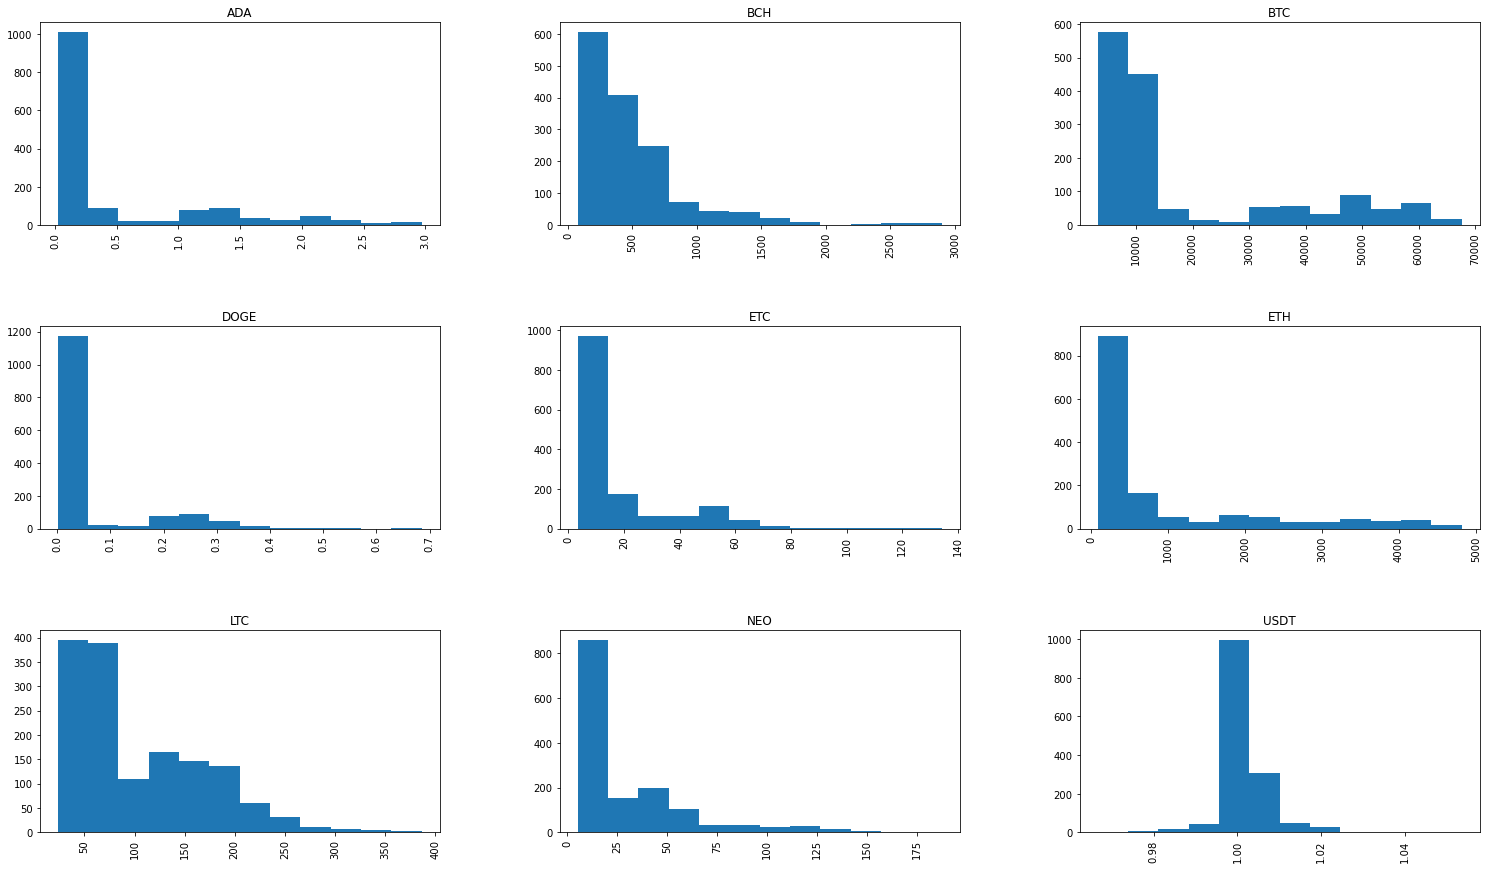

In [133]:
## Histograms and line chart to analyze the closing price for all the cryptocurrencies
## Creating histograms for closing price for each cryptocurrency

crypto_df.hist(by='Symbol', column='Close_price',figsize=[25,15], bins=12)

###### From the histograms created for closing price of all the cryptocurrencies shown above, we could clearly understand the closing price for all the cryptocurrencies are positively skewed except Tether (USDT) which is having normal distribution (no skew).

array([[<AxesSubplot:title={'center':'ADA'}>,
        <AxesSubplot:title={'center':'BCH'}>,
        <AxesSubplot:title={'center':'BTC'}>],
       [<AxesSubplot:title={'center':'DOGE'}>,
        <AxesSubplot:title={'center':'ETC'}>,
        <AxesSubplot:title={'center':'ETH'}>],
       [<AxesSubplot:title={'center':'LTC'}>,
        <AxesSubplot:title={'center':'NEO'}>,
        <AxesSubplot:title={'center':'USDT'}>]], dtype=object)

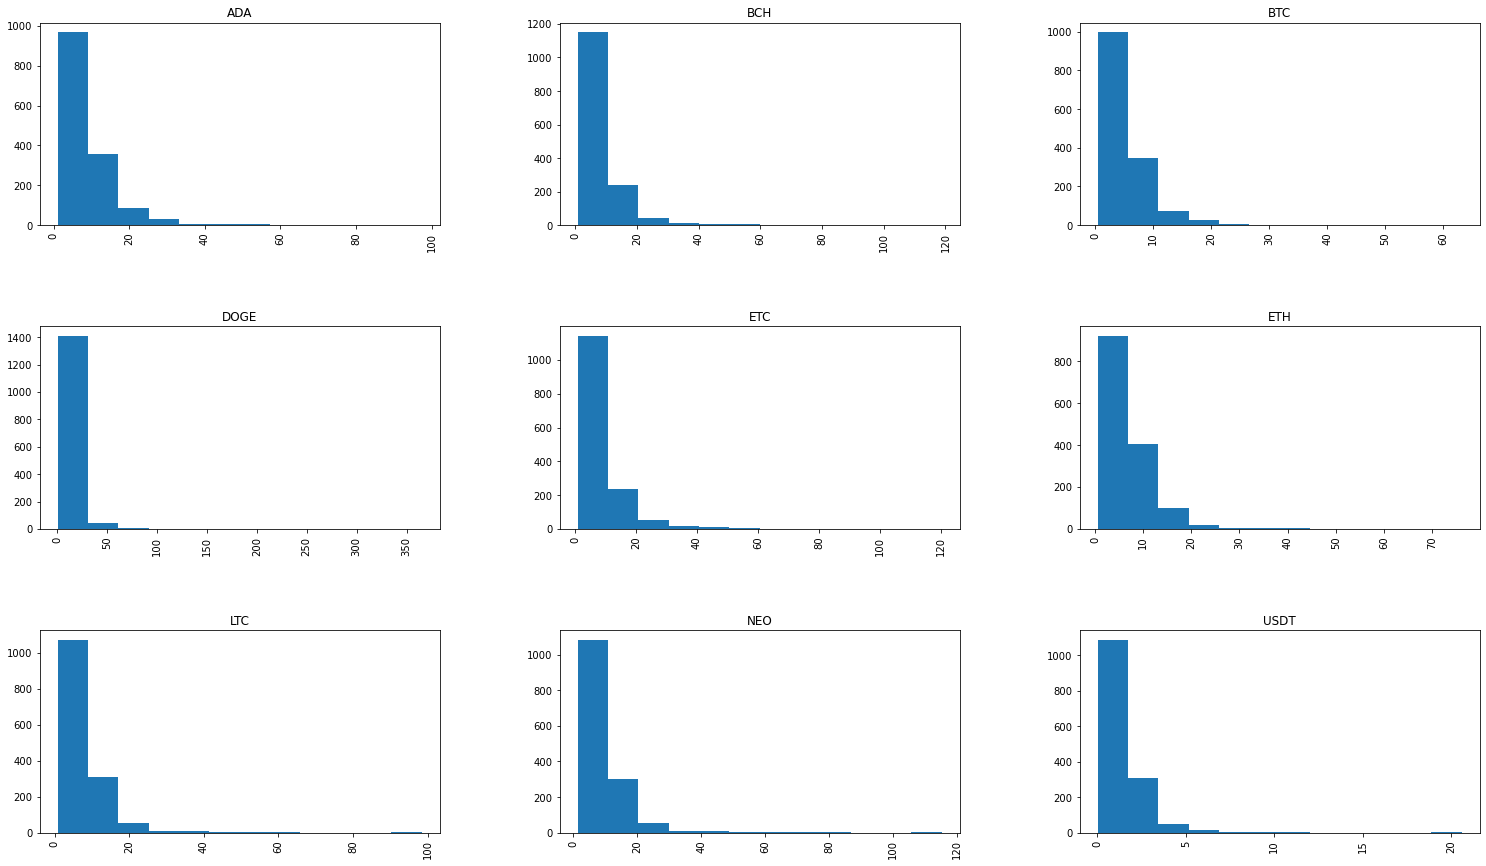

In [134]:
## Creating histograms for price fluctuation for each cryptocurrency

crypto_df.hist(by='Symbol', column='price_fluctuation_day', figsize=[25,15], bins=12)

##### From the histograms created for price fluctuation of all the cryptocurrencies shown above, we could clearly understand the price fluctuation for a day for all the cryptocurrencies are also positively skewed.

In [146]:
## Plotting candlestick charts for all cryptocurrencies
## To plot candlestick chart, we need to install mplfinance
## Installed mplfinance lib and importing candlestick_ohlc module

import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mpl_dates

In [194]:
## Defining the style to be used for the plot

plt.style.use('seaborn-darkgrid')

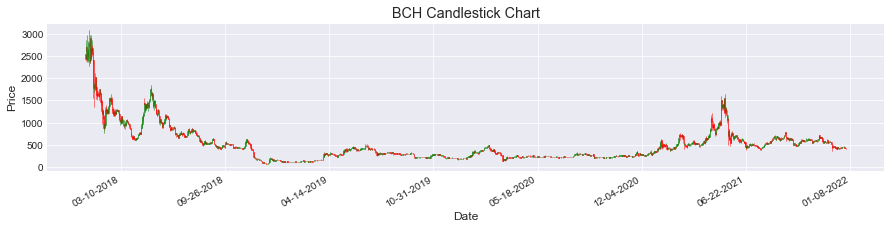

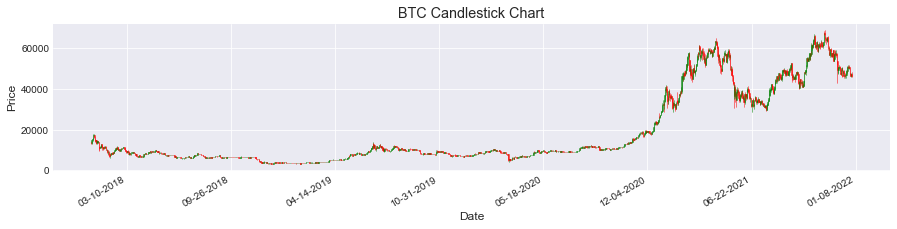

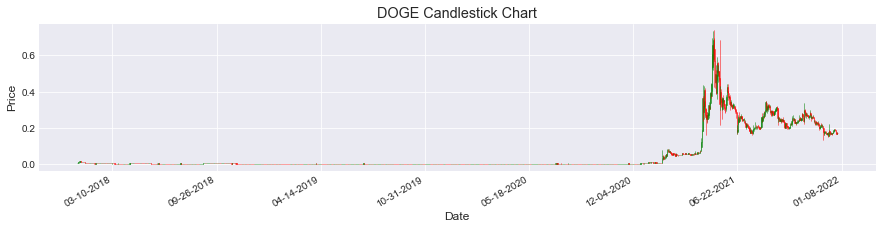

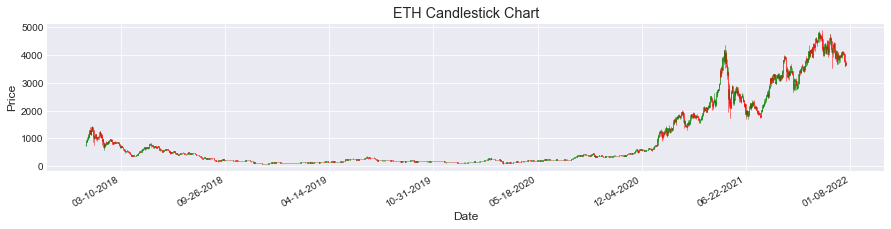

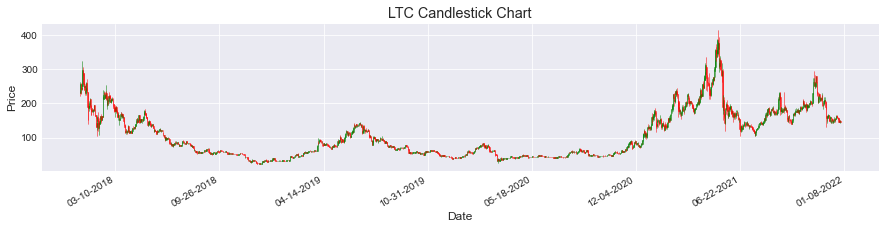

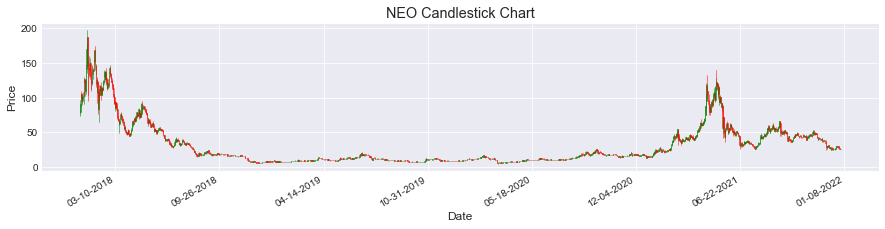

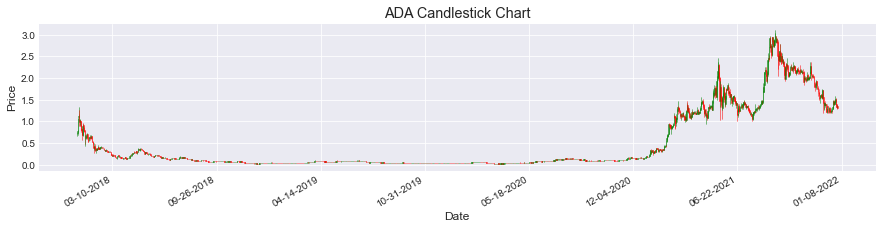

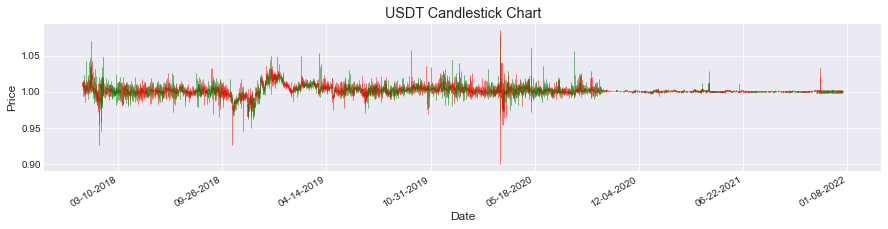

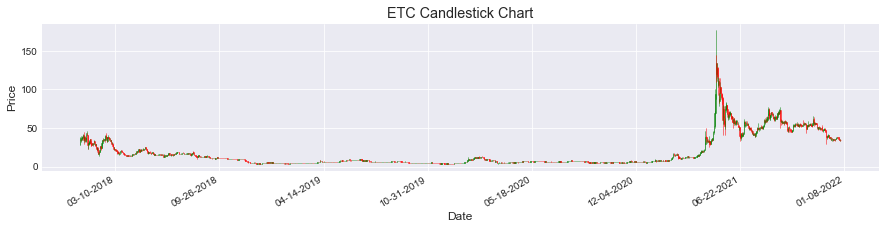

In [199]:
## Extracting the data for major cryptocurrencies given in the below link and create candlestick chart

crypto_list = ['BCH','BTC','DOGE','ETH','LTC','NEO','ADA','USDT','ETC']

##Looping through the crypto list and plot candlestick chart for all the crypto currencies for 3 years of data
for crypto in crypto_list:
    crypto_sub_df = crypto_df[crypto_df.Symbol == crypto]
    
    # Extracting Data for plotting
    df = crypto_sub_df.loc[:, ['Trading_date', 'Open_price', 'High_price', 'Low_price', 'Close_price']]
    df['Trading_date'] = df['Trading_date'].map(mpdates.date2num)
    
    # creating Subplots
    fig, ax = plt.subplots()

    fig.set_figheight(3)
    fig.set_figwidth(15)
 
    # plotting the data
    candlestick_ohlc(ax, df.values, width = 1,
                 colorup = 'green', colordown = 'red',
                 alpha = 0.8)
 
    # allow grid
    ax.grid(True)
 
    # Setting labels
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
 
    # setting title
    plt.title(crypto + ' Candlestick Chart')
 
    # Formatting Date
    date_format = mpdates.DateFormatter('%m-%d-%Y')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()
 
    # show the plot
    plt.show()
        

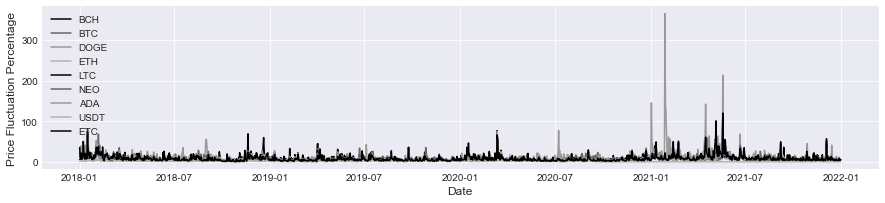

In [209]:
## Creating the line chart for price fluctuation percentage for all the cryptocurrencies
## Plot individual lines with custom colors, styles, and widths

warnings.filterwarnings("ignore")
fig,ax = plt.subplots()

fig.set_figheight(3)
fig.set_figwidth(15)

for name in crypto_list:
    ax.plot(crypto_df[crypto_df.Symbol == name].Trading_date,crypto_df[crypto_df.Symbol == name].price_fluctuation_day,label=name)

ax.set_xlabel("Date")
ax.set_ylabel("Price Fluctuation Percentage")
ax.legend(loc='upper left')


In [210]:
## Calculating stats (mean, max and min) for price fluctuation percentage variable present in the dataset for all the cryptocurrencies

crypto_df.groupby('Symbol').agg({'price_fluctuation_day': ['min', 'max', 'mean']})

price_fluctuation_day                  
                         min     max      mean
Symbol                                        
ADA                     1.15   97.28  8.929302
BCH                     0.92  118.72  8.218741
BTC                     0.46   63.14  5.207023
DOGE                    0.93  364.93  9.303566
ETC                     0.93  120.18  8.504148
ETH                     0.61   76.08  6.960637
LTC                     0.86   98.35  7.720418
NEO                     1.38  115.17  9.059651
USDT                    0.03   20.60  1.283025

##### From the above line chart and the output, we could clearly see the price flucation percentage ((high price - low price)*100/low_price) for the day for all the cryptocurrencies are very high. It ranges from 1 to 350%. The mean of the price fluctuation ranges from 1 to 10% for a day which is very volatile compared to stock/share prices 

##### Step 9: Saving the final output to CSV file

In [212]:
## Storing the final dataframe to csv file which can be used to make join with other dataframes

crypto_df.to_csv("Crypto_Currencies_Price.csv", index=False)